In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy import optimize
import math
%matplotlib inline

In [2]:
dataset = pd.read_csv('./ex2data1.txt')
data = np.array(dataset)

In [3]:
data

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [4]:
# Load data into arrays
X = dataset[['Exam1', 'Exam2']].values.reshape(-1,2)
y = dataset[['Admitted']].values.reshape(-1,1)

In [7]:
def plotData(X,y):
    # X = feature values, locate all rows of all columns except the last
    X = dataset.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = dataset.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = dataset.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = dataset.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()
    plt.show()

In [8]:
def plotDecisionBoundary(theta, X, y):
    y = dataset.iloc[:, -1]
    admitted = dataset.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = dataset.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    
    x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
    y_value=-(theta[0] +theta[1]*x_value)/theta[2]
    plt.plot(x_value,y_value, "r")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(loc=0)
    

In [9]:
def sigmoid(z):
    g = np.zeros(z.shape)
    
    g = 1.0 / (1 + np.exp(-z))
    
    return g

In [10]:
def costFunction(theta,X,y):
    m = len(y)
    theta = np.array([theta])
    #X = np.array(X)
    #y = np.array(y)
    
    grad = np.zeros(theta.shape)
    
    
    predictions = sigmoid(X.dot(theta.T))
    
    J = 1.0/m * np.sum(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    
    grad = 1.0/m * (predictions-y).T.dot(X)
    
    return J,grad

In [11]:
def gradient(theta, X, y):
    m = len(y)
    theta = np.array([theta])
    X = np.array(X)
    y = np.array(y)
    
    
    predictions = sigmoid(X.dot(theta.T))
    
    grad = 1.0/m * (predictions-y).T.dot(X)

    return grad

In [12]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    for i in range(0, m):
        if sigmoid(X[i,:].dot(theta)) >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    return p

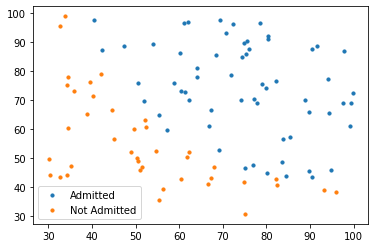

In [13]:
plotData(X,y)

In [14]:
m,n = X.shape


In [15]:
X = np.concatenate((np.ones((m,1)), X), axis=1)

In [16]:
initial_theta = np.zeros(n+1)

In [17]:
cost,grad = costFunction(initial_theta,X,y)

In [18]:
cost

0.6931471805599453

In [19]:
grad

array([[ -0.1       , -12.00921659, -11.26284221]])

In [20]:
test_theta = np.array([-24,0.2,0.2])

In [21]:
cost,grad = costFunction(test_theta,X,y)

In [22]:
cost

0.21833019382659796

In [23]:
grad

array([[0.04290299, 2.56623412, 2.64679737]])

In [38]:
# Optimize with fmin_tnc
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
# result = opt.fmin_tnc(func=costFunction, x0=initial_theta, fprime=gradient, args=(X, y))

In [39]:
res

     fun: 0.2034977015894743
     jac: array([[9.07652441e-09, 9.36760996e-08, 4.82243362e-07]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131869,   0.20623159,   0.20147149])

In [504]:
# Cost using optimized theta
costFunction(result[0], X, y)

(0.2034977015894743, array([[9.07652441e-09, 9.36760996e-08, 4.82243362e-07]]))

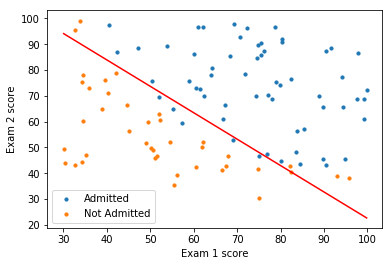

In [505]:
# Plot the decision boundary with the optimal theta 
plotDecisionBoundary(result[0], X, y)

In [506]:
prob = sigmoid(np.array([[1,45,85]]).dot(optim_theta))

In [507]:
print('For a student with scores 45 and 85, we predict an admission probability of: ' + str(prob[0]))

For a student with scores 45 and 85, we predict an admission probability of: 0.7762906242704579


In [516]:
# Predict accuracy of learnt model on training set
p = predict(optim_theta, X)

In [517]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(p, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 89%
